In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


훈련 데이터는 28 X 28 크기의 이미지 60000개로 이루어져 있고 타깃도 60000개의 원소가 있는 1차원 배열이다.
테스트 세트는 10000개의 이미지로 되어있다.

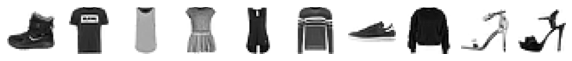

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap = 'gray_r')
  axs[i].axis('off')
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


패션 MNIST의 타깃은 0 ~ 9까지의 숫자 레이블로 구성된다. 패션 MNIST에 포함된 10개 레이블의 의미는 다음과 같다.

0: 티셔츠 1: 바지 2: 스웨터 3: 드레스 4: 코트 5: 샌달 6: 셔츠 7: 스니커즈 8: 가방 9: 앵클 부츠

In [ ]:
import numpy as np

print(np.unique(train_target, return_counts = True)) # 레이블 당 샘플 개수

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


#로지스틱 회귀로 패션 아이템 분류하기
---
훈련 샘플이 60000개나 되기 때문에 전체 데이터를 한꺼번에 사용하여 모델을 훈련하는 것보다 샘플을 하나씩 꺼내서 모델을 훈련하는 방법이 더 효율적이다. 이런 상황에 잘 맞는 방법이 확률적 경사 하강법이다. SGDClassifier는 2차원 입력을 다루지 못하므로 reshape() 메서드를 사용하여 각 샘플을 1차원 배열로 만들자.

In [ ]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss ='log', max_iter = 5, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8195666666666668


#인공 신경망(Artificial Neural)
---
28X28의 이미지를 사용하기 때문에 총 784개의 픽셀이 존재한다. 이 픽셀을 $x_1, x_2, ..., x_{784}$라고 나타내고, 이를 **입력층(input layer)**이라고 한다. 각 픽셀에 가중치를 곱해서 클래스를 예측한다. 클래스 예측을 위한 신경망의 최종 값을 **출력층(output layer)**이라 한다. 인공 신경망에서 z값을 계산하는 단위를 **뉴런(neuron)**이라고 한다.

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape) # 검증 세트

(38400, 784) (38400,)
(9600, 784) (9600,)


In [ ]:
dense = keras.layers.Dense(10, activation = 'softmax', input_shape = (784,)) # 순서대로 뉴런 개수, 뉴런의 출력에 적용할 함수, 입력의 크기
model = keras.Sequential(dense)

소프트맥스와 같이 뉴런의 선형 방정식 계산 결과에 적용되는 함수를 **활성화 함수(activation function)**이라고 한다.

케라스 모델은 훈련하기 전에 설정 단계가 있는데, 손실 함수의 종류를 반드시 지정해야 하고, 훈련 과정에서 계산하고 싶은 측정값을 지정한다.

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1200/1200 [==============================] - 2s 1ms/step - loss: 0.6337 - accuracy: 0.7849
Epoch 2/5
1200/1200 [==============================] - 1s 1ms/step - loss: 0.4907 - accuracy: 0.8341
Epoch 3/5
1200/1200 [==============================] - 1s 1ms/step - loss: 0.4646 - accuracy: 0.8440
Epoch 4/5
1200/1200 [==============================] - 1s 1ms/step - loss: 0.4516 - accuracy: 0.8485
Epoch 5/5
1200/1200 [==============================] - 1s 1ms/step - loss: 0.4429 - accuracy: 0.8515


In [ ]:
model.evaluate(val_scaled, val_target)

300/300 [==============================] - 0s 985us/step - loss: 0.4401 - accuracy: 0.8539


[0.4400937259197235, 0.8538541793823242]

#2. 인공 신경망은 층을 많이 추가하여 성능을 높일 수 있다.

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0 # 픽셀값을 0 ~ 255에서 0 ~ 1로 변환
train_scaled = train_scaled.reshape(-1, 28*28) # 784 크기의 1차원 배열로 변환
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

4423680/4422102 [==============================] - 0s 0us/step


인공 신경망 모델에 2개의 층을 추가해보자. 이전의 신경망 모델과 다른 점은 입력층과 출력층 사이에 밀집층이 추가된 것이다. 입력층과 출력층 사이에 있는 모든 층을 **은닉층(Hidden Layer)**이라고 한다.
출력층에 적용하는 활성화 함수는 이진 분류일 경우 시그모이드 함수, 다중 분류일 경우 소프트맥스 함수로 종류가 제한되어 있지만 은닉층의 활성화 함수는 비교적 자유롭다. 대표적으로는 시그모이드 함수와 ReLU 함수가 있다.

시그모이드 활성화 함수를 사용한 은닉층과 소프트맥스 함수를 사용한 출력층을 케라스의 Dense 클래스로 만들어 보자.

In [ ]:
dense1 = keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,)) # 100개의 뉴런을 가진 은닉층
dense2 = keras.layers.Dense(10, activation = 'softmax') # 10개의 클래스를 분류하는 출력층

model = keras.Sequential([dense1, dense2]) # 심층 신경망(Deep Neural Network, DNN)

model.summary() # 모델의 이름, 모델에 들어 있는 층(이름, 클래스, 크기, 모델 파라미터 개수)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8069
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4086 - accuracy: 0.8520
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3736 - accuracy: 0.8654
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3497 - accuracy: 0.8737
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3329 - accuracy: 0.8795


#ReLU 함수
---
시그모이드 활성화 함수는 오른쪽과 왼쪽 끝으로 갈 수록 그래프가 누워있기 때문에 올바른 출력을 만드는데 신속하게 대응하지 못한다. 이를 개선하기 위해 고안된 함수가 ReLU 함수이다. 렐루 함수는 max(0, z)로 쓸 수 있고 z가 0보다 크면 z를, 0보다 작으면 0을 출력한다. 이 함수는 특히 이미지 처리에서 좋은 성능을 낸다고 알려져 있다.

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28))) # 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 Flatten 클래스
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
# Flatten 층의 사용으로 reshape 메서드를 사용하지 않았다.
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5274 - accuracy: 0.8149
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3934 - accuracy: 0.8588
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3565 - accuracy: 0.8713
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3357 - accuracy: 0.8807
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3202 - accuracy: 0.8856


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3662 - accuracy: 0.8811


[0.36618268489837646, 0.8810833096504211]

신경망에는 특히 하이퍼파라미터가 많다. 은닉층의 개수, 은닉층의 뉴런 개수, 활성화 함수, 층의 종류, batch_size, epochs 수, compile() 메서드의 경사 하강법 알고리즘 등등. 케라스는 다양한 종류의 경사 하강법 알고리즘을 제공하는데, 이들을 **옵티마이저(Optimizer)**라고 한다. 케라스는 기본적으로 RMSprop 알고리즘을 사용하고 이 알고리즘의 학습률 역시 하이퍼파라미터이다. 여러 옵티마이저를 테스트해 보자.

In [ ]:
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy') # sgd = keras.optimizers.SGD(learning_rate = a) a는 default 0.01

기본 경사하강법 옵티마이저는 모두 SGD 클래스에서 제공한다. SCD 클래스의 momentum 매개변수의 기본값은 0인데, 이를 0보다 큰 값으로 지정하면 마치 이전의 그레이디언트를 가속도처럼 사용하는 **모멘텀 최적화(Momentum Optimization)**을 사용한다. momentum 변수의 기본값은 0.9 이상이다. 또한 SGD 클래스의 nesterov 매개변수를 기본값 False에서 True로 바꾸면 **네스트로프 모멘텀 최적화(Nesterov Momentum Optimization)**를 사용한다. 네스테로프 가속 경사는 모멘텀 최적화를 2번 반복하여 구현한다. 대부분 기본 확률적 경사 하강법보다 나은 성능을 보인다. 모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있고, 그렇게 하면 안정적으로 최적점에 수렴할 가능성이 높다. 이런 학습률을 **적응적 학습률(Adaptive Learning Rate)**이라고 한다. 이런 방식들로 학습률 매개변수를 튜닝하는 수고를 덜 수 있다. 적응적 학습률을 사용하는 대표적인 optimizer가 Adagrad와 RMSprop인데, 모멘텀 최적화와 RMSprop의 장접을 접목한 것이 Adam이다. Adam 클래스의 매개변수 기본값을 사용해 MNIST 모델을 훈련해 보자.

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5220 - accuracy: 0.8185
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3909 - accuracy: 0.8592
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3482 - accuracy: 0.8737
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3233 - accuracy: 0.8818
Epoch 5/5
375/375 [==============================] - 0s 1ms/step - loss: 0.3390 - accuracy: 0.8790


[0.33900806307792664, 0.8790000081062317]

#3. 케라스 API를 사용하여 모델을 훈련하는데 필요한 다양한 도구들을 알아보자.

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28, 28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model

model = model_fn()
model.summary()

4423680/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

print(history.history.keys())

dict_keys(['loss', 'accuracy'])


history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 리스트이다. 맷플롯립을 사용하여 그래프로 그려보자.

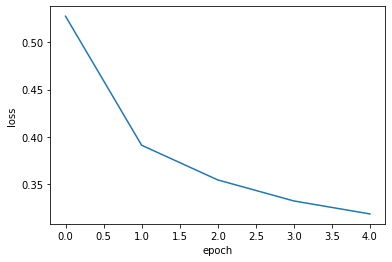

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

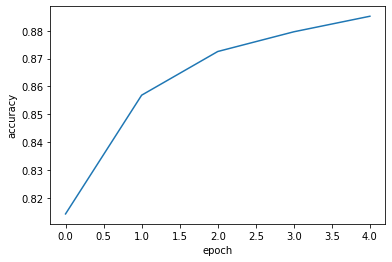

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

에포크마다 손실이 감소하고 정확도가 향상되는걸 알 수 있다. 에포크 횟수를 20으로 늘려서 모델을 훈련하고 손실 그래프를 그려보자.

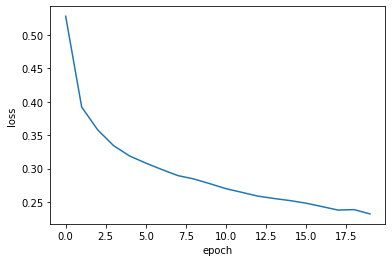

In [ ]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

epoch에 따른 과대/과소적합을 파악하려면 훈련 세트 뿐만 아니라 검증 세트에 대한 점수도 필요하다.

In [ ]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


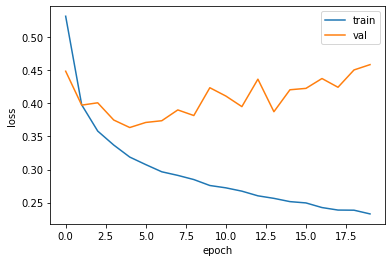

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

epoch마다 훈련 손실은 꾸준히 감소하지만 검증 손실은 감소하다가 다시 상승한다. 이 지점을 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가할 것이다. 과대적합을 막기 위해서는 규제를 도입하거나, 옵티마이저 하이퍼파라미터를 조정하는 방법이 있다. 우선 후자를 살펴보자.

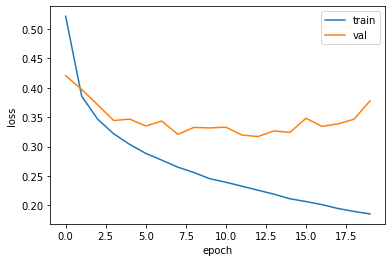

In [ ]:
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Adam 옵티마이저가 데이터 셋에 잘 맞아서 과대적합이 줄었음을 볼 수 있다. 더 나은 손실 곡선을 얻으려면 학습률을 조정해볼 수도 있다.

#드롭아웃(dropout)
---
신경망에서 사용하는 대표적인 규제 방법에는 **드롭아웃(dropout)**이 있다. 이 방식은 훈련 과정에서 층에 있는 일부 뉴런의 출력을 랜덤으로 0으로 만들어 과대적합을 막는다. 뉴런은 랜덤하게 드롭아웃되고 얼마나 많은 뉴런을 드롭할지가 우리가 정해야할 하이퍼파라미터이다. 어떤 층의 일부 뉴런이 랜덤하게 꺼지면, 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있다. 다른 관점으로 보면 드롭아웃이 적용된 신경망들의 앙상블로 볼 수 있다. 앙상블은 과대적합을 막는 좋은 기법이다.

In [ ]:
model = model_fn(keras.layers.Dropout(0.3)) # 30%의 뉴런 드롭아웃
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


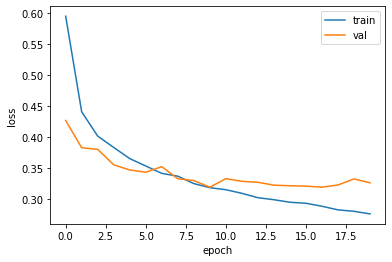

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

과대적합이 확연히 준 것을 볼 수 있다. 과대적합 되지 않은 모델을 얻기 위해 에포크 횟수를 10으로 만든 후 다시 훈련해보자. 또한 그렇게 만든 모델을 저장해보자.

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))

model.save_weights('model-weights.h5') # 훈련된 모델의 파라미터를 저장하는 메서드, 확장자는 default 텐서플로우의 체크포인트 포맷, h5은 HDF5
model.save('model-whole.h5') # 모델의 구조와 모델 파라미터를 같이 저장하는 메서드, 확장자는 default 텐서플로우의 SaveModel 포맷, h6은 HDF5

In [ ]:
!ls -al *.h5

-rw-r--r-- 1 root root 332480 Jul  2 04:04 model-weights.h5
-rw-r--r-- 1 root root 981736 Jul  2 04:04 model-whole.h5


1. 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터르 읽어서 사용하자.
2. model-whole.h5 파일에서 새로운 모델을 만들어 바로 사용하자.

In [ ]:
model = model_fn(keras.layers.Dropout(0,3)) # 훈련하지 않은 모델
model.load_weights('model-weights.h5')

케라스의 predict() 메서드는 샘플마다 10개의 클래스에 대한 확률을 반환한다. (이진 분류라면 양성 클래스에 대한 확률 하나만 반환) 연제 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플 개수가 12000개이므로 predict() 메서드는 (12000, 10) 크기의 배열을 반환한다. 따라서 10개 확률 중 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교하여 정확도를 계산해 보자.

In [ ]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))

0.8805833333333334


In [ ]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3221 - accuracy: 0.8806


[0.32214921712875366, 0.8805833458900452]

#콜백(callback)
---
지금까지의 과정을 돌아보면 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상승하는 지점을 확인한 후 모델이 과대적합 되지 않는 에포크만큼 다시 훈련하는 과정을 거쳤다. 모델을 두 번씩 훈련하지 않고 한번에 끝낼 수는 없을까?
**콜백(Callback)**은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체이다. ModelCheckpoint 콜백은 기본적으로 최상의 검증 점수를 만드는 모델을 저장한다.

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs =20, verbose = 0, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb])

In [ ]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3190 - accuracy: 0.8860


[0.31903132796287537, 0.8859999775886536]

검증 점수가 한번 상승하기 시작하면 그 이후에는 과대적합이 더 커지기 때문에 훈련을 계속할 필요가 없다. 따라서 상승하기 시작하는 지점에서 훈련을 중지하면 컴퓨터 자원과 시간을 아낄 수 있다. 이렇게 훈련을 미리 중지하는 것을 **조기 종료(Early Stopping)**이라고 한다. Keras에서는 조기 종료를 위한 EarlyStopping 콜백을 제공하는데, 이 콜백의 patience 매개변수의 값만큼 에포크를 했을 때 검증 점수가 향상되지 않으면 훈련을 중지한다. 또한 restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs =20, verbose = 0, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

print(early_stopping_cb.stopped_epoch) # 몇 번째 에포크에서 훈련이 중지되었는가? patience를 2로 지정했으므로 나오는 값 - 1 번째 에포크가 최상의 모델

10


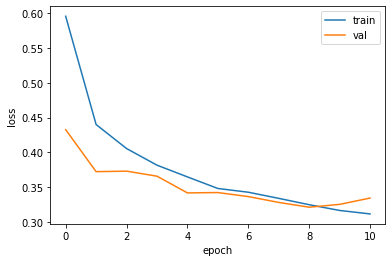

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3214 - accuracy: 0.8827


[0.32136070728302, 0.8826666474342346]